In [1]:
import numpy as np
from scipy.sparse import diags
import scipy
from time import time
import matplotlib.pyplot as plt
import scipy.optimize
np.random.seed(0)

In [2]:
from oracles import QuadraticOracle
from optimization import conjugate_gradients, gradient_descent

In [3]:
colors = ['b', 'g', 'r', 'c', 'y']

In [4]:
def iterations_number_gd(n, k):
  diag = np.random.uniform(low=1, high=k, size=n)
  diag[0], diag[-1] = 1, k
  A = scipy.sparse.diags(diag)
  b = np.random.normal(np.zeros(n), np.ones(n), n)
  oracle = QuadraticOracle(A, b)
  history = gradient_descent(oracle, np.zeros(n), trace=True, display=False)[2]
  return len(history['time'])

Для каждого фиксированного $n$ мы по 4 раза считаем $T(n,k)$. Потом к каждому элементу массива $K$ применяем нашу функцию, которая считает число итераций. Получится массив $T$ такой, что $T[i]$ --- число итераций, необходимых для сходимости при $K[i]$ и зафиксированном $n$.

График градиентного спуска

/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


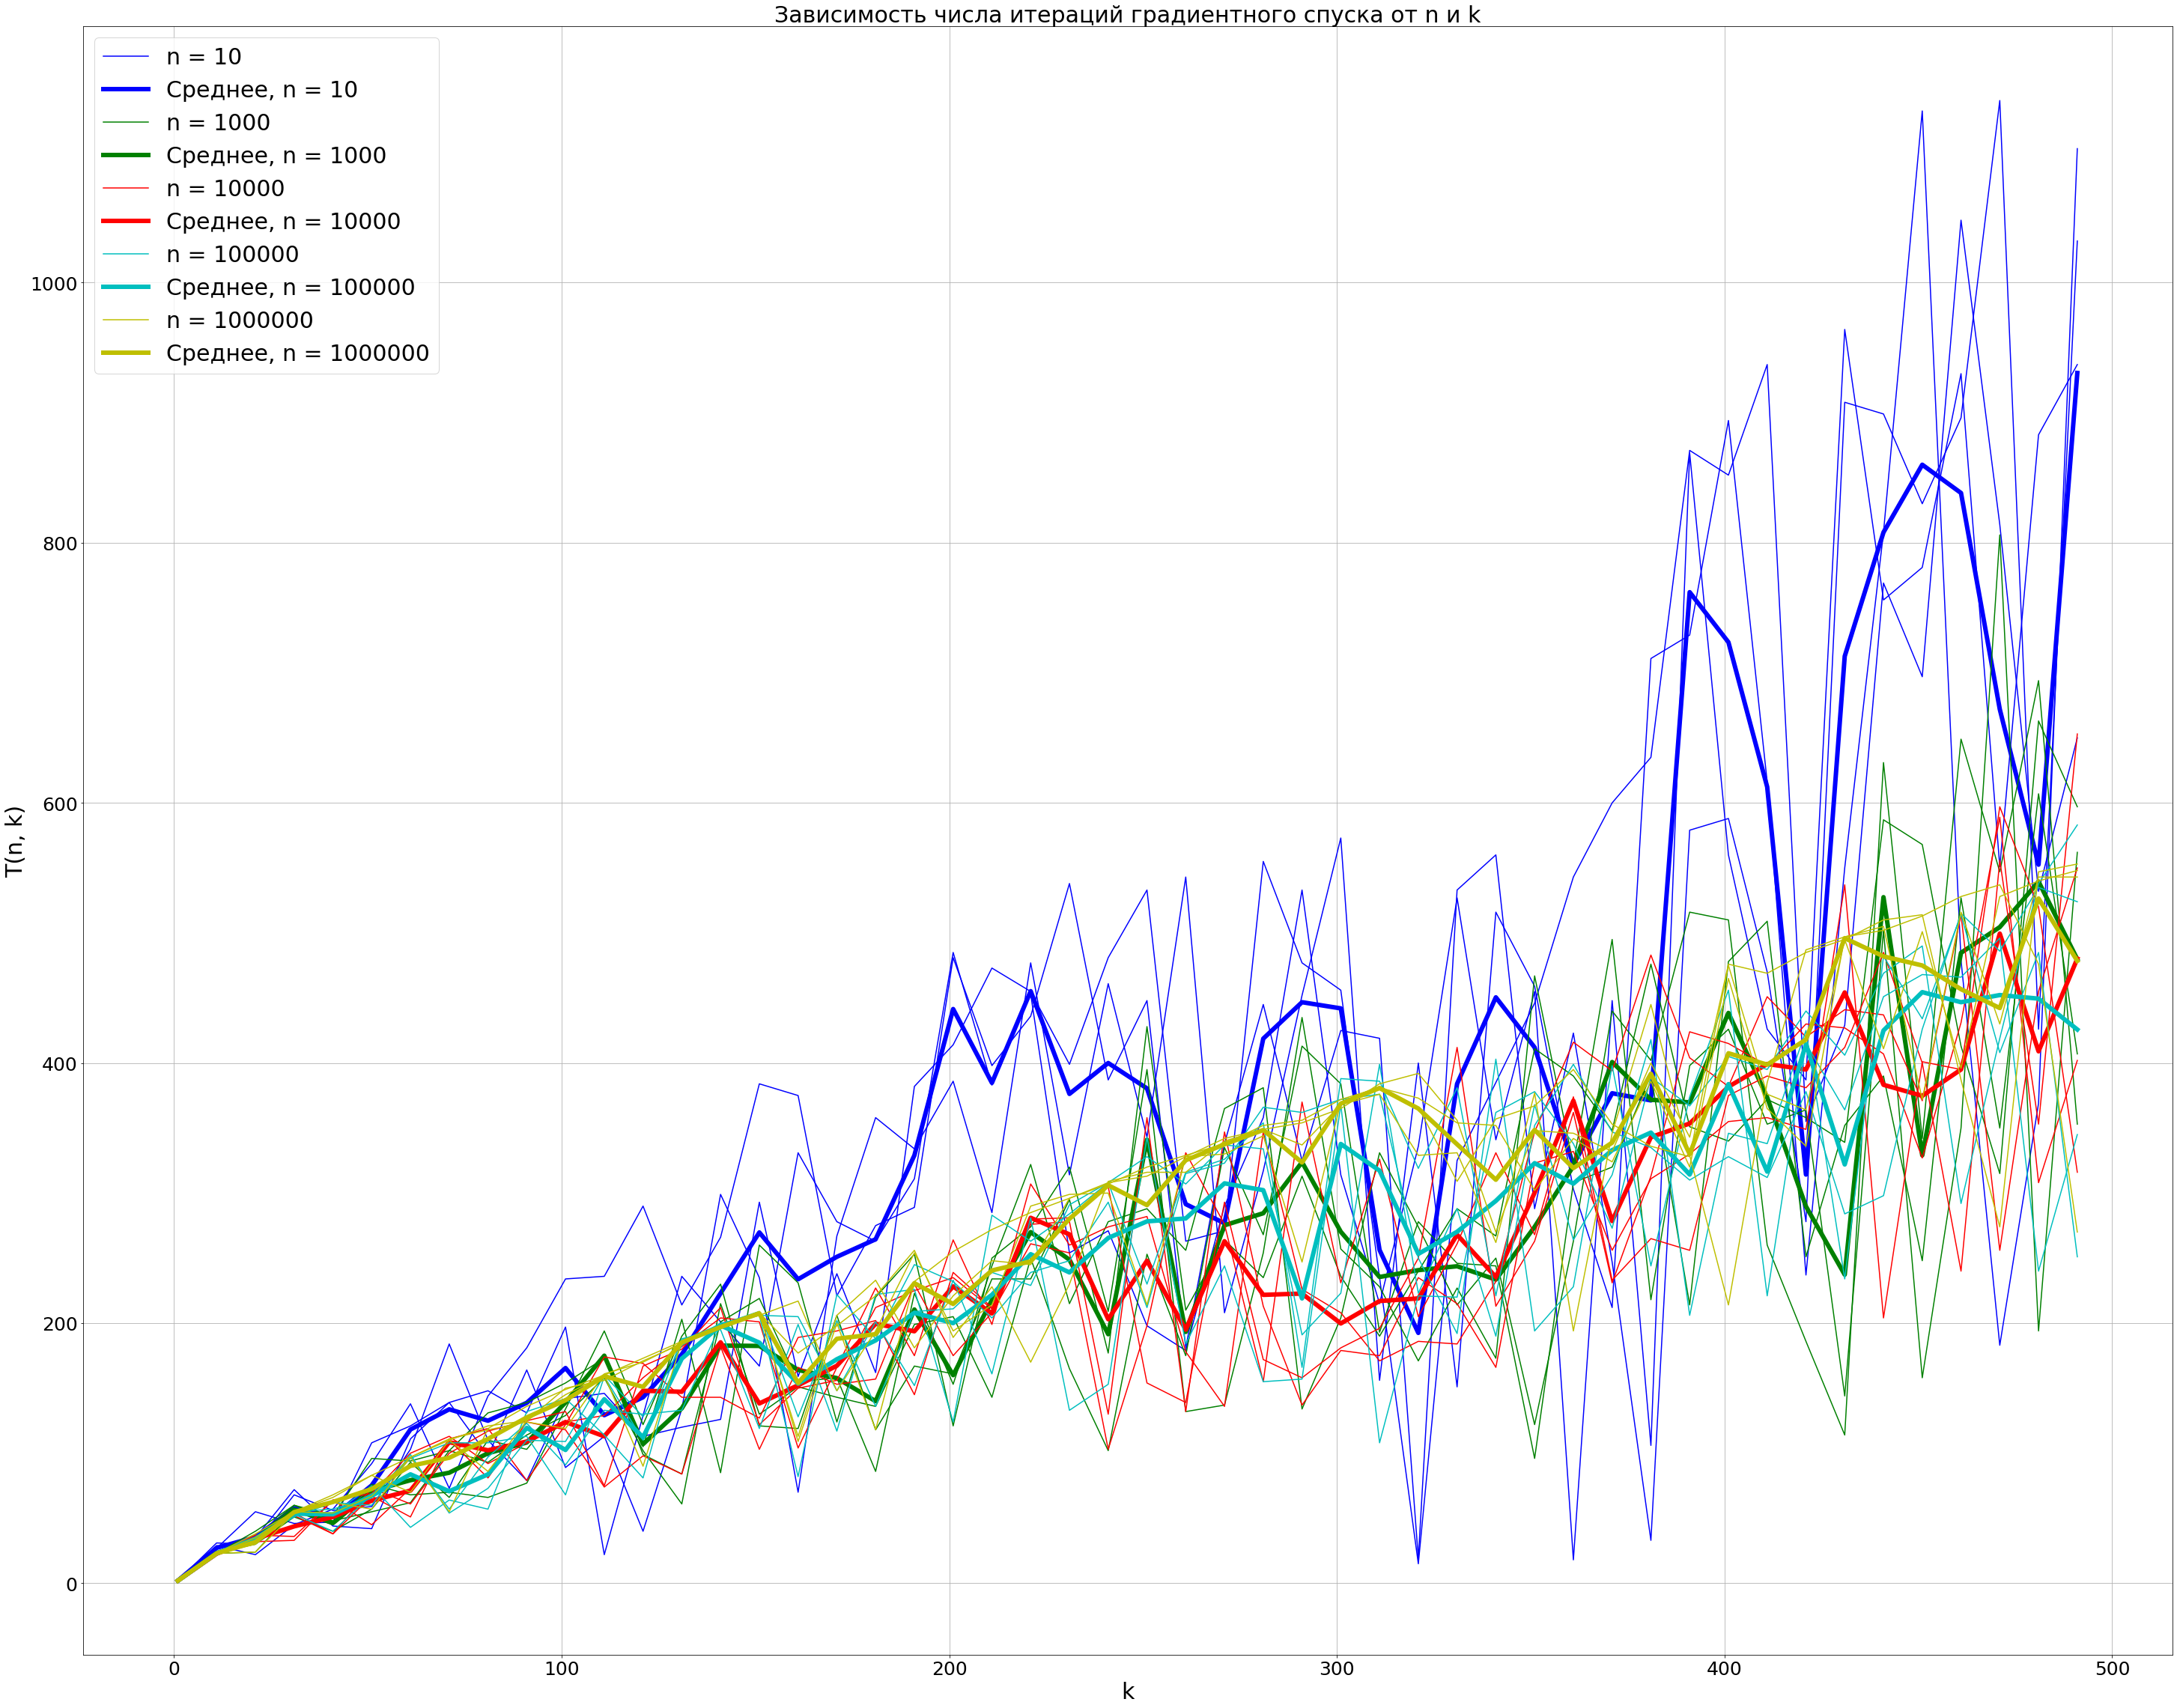

In [5]:
n_iters = [10, 1000, 10000, 100000, 1000000]
K = np.arange(1, 500, 10)

from matplotlib.pyplot import figure

fig, ax = plt.subplots()
fig.set_size_inches((50,40))
plt.xlabel('k', fontsize=30)
plt.ylabel('T(n, k)', fontsize=30)
plt.title('Зависимость числа итераций градиентного спуска от n и k', fontsize=30)
array = []

for i, n in enumerate(n_iters):
  temp = np.zeros(len(K))
  for _ in range(4):
    T_func = np.vectorize(iterations_number_gd)
    T = T_func(n, K)
    temp += T
    line1, = plt.plot(K, T, label=f'n = {n}', color = colors[i])
  array.append(line1)
  temp /= 4
  line1, = plt.plot(K, temp, label=f'Среднее, n = {n}', color = colors[i], linewidth=6)
  array.append(line1)

ax.legend(handles=array, fancybox=True, fontsize = 30)
plt.tick_params(labelsize = 25)
ax.grid()
plt.savefig('gd.png')

График метода сопряженных градиентов

In [6]:
def iterations_number_cg(n, k):
  diag = np.random.uniform(low=1, high=k, size=n)
  diag[0], diag[-1] = 1, k
  A = scipy.sparse.diags(diag)
  b = np.random.uniform(low=0, high=k, size=n)

  def matvec(x):
    return A.dot(x)
  #oracle = QuadraticOracle(A, b)
  history = conjugate_gradients(matvec, b, np.zeros(n), trace=True, display=False, 
                                comp=True, prev_tolerance=1e-5)[2]
  return len(history['time'])

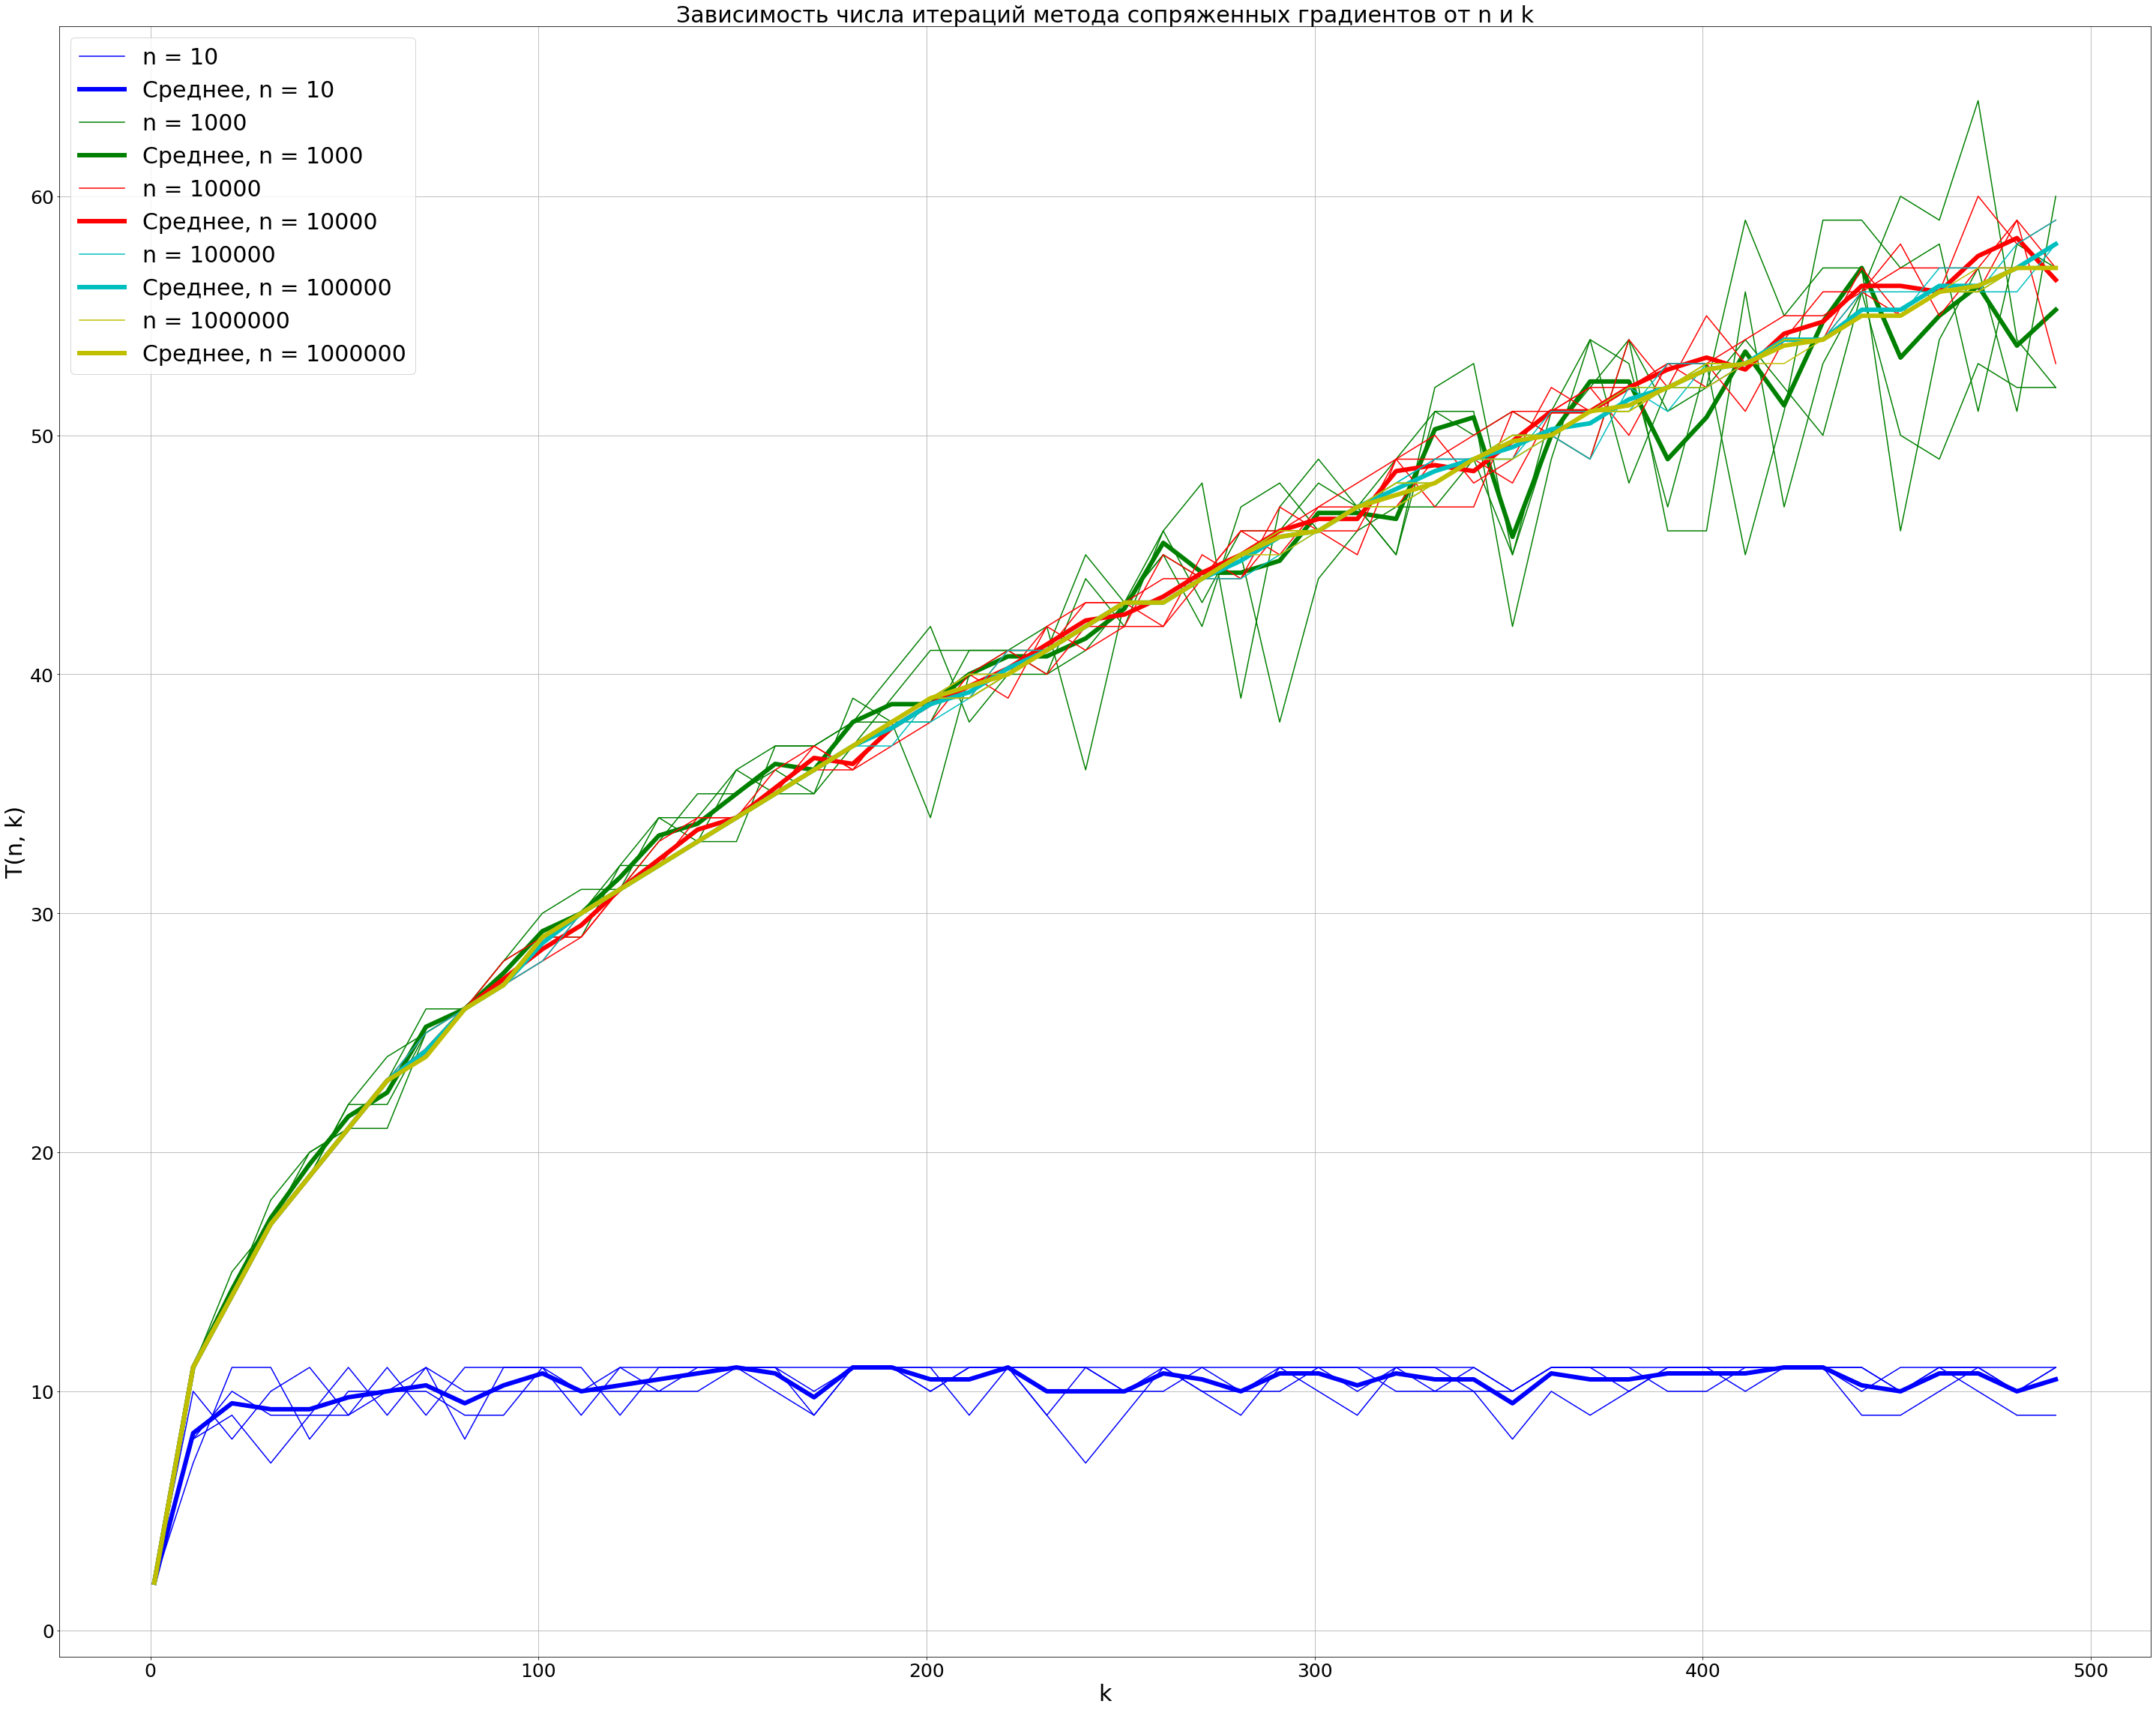

In [7]:
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt
n_iters = [10, 1000, 10000, 100000, 1000000]
K = np.arange(1, 500, 10)

fig, ax = plt.subplots()
#plt.rcParams["figure.figsize"] = (50, 40)
fig.set_size_inches((50,40))
plt.xlabel('k', fontsize=30)
plt.ylabel('T(n, k)', fontsize=30)
plt.title('Зависимость числа итераций метода сопряженных градиентов от n и k', fontsize=30)
array = []

for i, n in enumerate(n_iters):
  temp = np.zeros(len(K))
  for _ in range(4):
    T_func = np.vectorize(iterations_number_cg)
    T = T_func(n, K)
    temp += T
    line1, = plt.plot(K, T, label=f'n = {n}', color = colors[i])
  array.append(line1)
  temp /= 4
  line1, = plt.plot(K, temp, label=f'Среднее, n = {n}', color = colors[i], linewidth=6)
  array.append(line1)

ax.legend(handles=array, fancybox=True, fontsize = 30)
plt.tick_params(labelsize = 25)
ax.grid()
plt.savefig('cg.png')